#       Text Classification for Sanskrit - LSTM based Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from aksharamukha import transliterate

import tqdm
import tqdm.notebook 

In [2]:
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense

from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

from sklearn import model_selection
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [30]:
df = pd.read_csv("amara_pada.csv", header=None)
df.columns = ['A','Shabda','C', 'D', 'Varga', 'F', 'G', 'H', 'I','J','K','L','M','N','O','P','Q']

for idx,word in tqdm.notebook.tqdm(enumerate(df['Shabda']), total=len(df['Shabda'])):
    df['Shabda'][idx] = transliterate.process('Devanagari', 'IAST', word)
    
for idx,word in tqdm.notebook.tqdm(enumerate(df['Varga']), total=len(df['Varga'])):
    df['Varga'][idx] = transliterate.process('Devanagari', 'IAST', word)

df.to_csv('amaraIAST.csv')


  0%|          | 0/11746 [00:00<?, ?it/s]

C:\Users\srini\AppData\Local\Temp/ipykernel_14460/1713320057.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Shabda'][idx] = transliterate.process('Devanagari', 'IAST', word)


KeyboardInterrupt: 

In [3]:
dfVarga = pd.read_csv('amaraIAST.csv')
vargas = dfVarga.Varga.unique()
print(vargas)
len(vargas)

['svargavargaḥ' 'vyomavargaḥ' 'digvargaḥ' 'kālavargaḥ' 'dhīvargaḥ'
 'śabdādivargaḥ' 'nāṭyavargaḥ' 'pātālabhogivargaḥ' 'narakavargaḥ'
 'vārivargaḥ' 'bhūmivargaḥ' 'puravargaḥ' 'śailavargaḥ' 'vanauṣadhivargaḥ'
 'siṃhādivargaḥ' 'manuṣyavargaḥ' 'brahmavargaḥ' 'kṣatriyavargaḥ'
 'vaiśyavargaḥ' 'śūdravargaḥ' 'viśeṣyanighnavargaḥ' 'saṅkīrṇavargaḥ'
 'nānārthavargaḥ' 'avyayavargaḥ']


24

In [4]:
dfVarga

,Unnamed: 0,Shabda,Varga
0,0,svar,svargavargaḥ
1,1,svarga,svargavargaḥ
2,2,nāka,svargavargaḥ
3,3,tridiva,svargavargaḥ
4,4,tridaśālaya,svargavargaḥ
...,...,...,...
11741,11741,sāmpratam,avyayavargaḥ
11742,11742,prāk,avyayavargaḥ
11743,11743,udak,avyayavargaḥ
11744,11744,pratyak,avyayavargaḥ


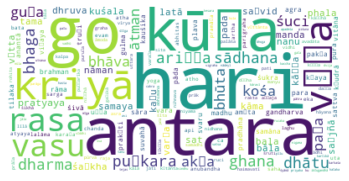

In [5]:
from wordcloud import WordCloud
text = " ".join(cat for cat in dfVarga['Shabda'])
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imsave('wordClound.png',word_cloud)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()


<AxesSubplot:xlabel='Varga'>

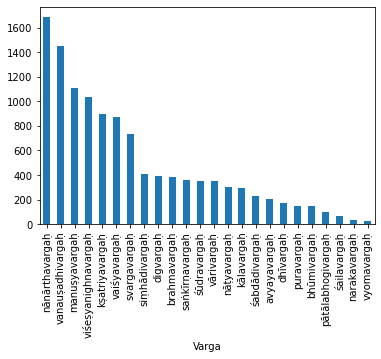

In [6]:
count = dfVarga['Varga'].value_counts().to_frame().reset_index()
count.columns = ['Varga', 'Count']
count.groupby('Varga')['Count'].sum().sort_values(ascending=False).plot(kind='bar')

In [7]:
vargaMax = list(count['Varga'][0:12])
vargaMax

['nānārthavargaḥ',
 'vanauṣadhivargaḥ',
 'manuṣyavargaḥ',
 'viśeṣyanighnavargaḥ',
 'kṣatriyavargaḥ',
 'vaiśyavargaḥ',
 'svargavargaḥ',
 'siṃhādivargaḥ',
 'digvargaḥ',
 'brahmavargaḥ',
 'saṅkīrṇavargaḥ',
 'vārivargaḥ']

In [8]:
dfVarga = dfVarga[dfVarga.Varga.isin(vargaMax)]
len(dfVarga)
dfVarga

,Unnamed: 0,Shabda,Varga
0,0,svar,svargavargaḥ
1,1,svarga,svargavargaḥ
2,2,nāka,svargavargaḥ
3,3,tridiva,svargavargaḥ
4,4,tridaśālaya,svargavargaḥ
...,...,...,...
11533,11533,hā,nānārthavargaḥ
11534,11534,ahaha,nānārthavargaḥ
11535,11535,ahaha,nānārthavargaḥ
11536,11536,hi,nānārthavargaḥ


[1688, 1451, 1105, 1038, 893, 869, 737, 407, 389, 386, 357, 353]


"\ncount = dfVarga['Varga'].value_counts().to_frame().reset_index()\ncount.columns = ['Varga', 'Count']\ncount.groupby('Varga')['Count'].sum().sort_values(ascending=False).plot(kind='bar')\n"

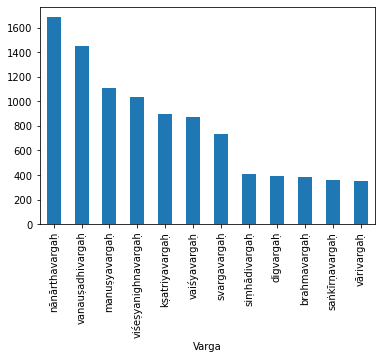

In [9]:
Varga = dfVarga['Varga'].value_counts()
names = vargaMax
values = [Varga[varg] for varg in vargaMax]

count = dfVarga['Varga'].value_counts().to_frame().reset_index()
count.columns = ['Varga', 'Count']
count.groupby('Varga')['Count'].sum().sort_values(ascending=False).plot(kind='bar')

print(values)

'''
count = dfVarga['Varga'].value_counts().to_frame().reset_index()
count.columns = ['Varga', 'Count']
count.groupby('Varga')['Count'].sum().sort_values(ascending=False).plot(kind='bar')
'''

In [15]:
y = pd.get_dummies(dfVarga['Varga'])
y

,brahmavargaḥ,digvargaḥ,kṣatriyavargaḥ,manuṣyavargaḥ,nānārthavargaḥ,saṅkīrṇavargaḥ,siṃhādivargaḥ,svargavargaḥ,vaiśyavargaḥ,vanauṣadhivargaḥ,viśeṣyanighnavargaḥ,vārivargaḥ
0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11533,0,0,0,0,1,0,0,0,0,0,0,0
11534,0,0,0,0,1,0,0,0,0,0,0,0
11535,0,0,0,0,1,0,0,0,0,0,0,0
11536,0,0,0,0,1,0,0,0,0,0,0,0


In [24]:
print(X_res.values)

[[0 'svar']
 [1 'svarga']
 [2 'nāka']
 ...
 [2506 'kāsāra']
 [2599 'kamala']
 [2342 'avāra']]


In [31]:

tokenizer = Tokenizer(num_words=500, split=' ', lower = False) 
tokenizer.fit_on_texts(dfVarga['Shabda'].values)
X_res = tokenizer.texts_to_sequences(dfVarga['Shabda'].values)
X_res = pad_sequences(X_res)
X_res


array([[  0, 458],
       [  0,   0],
       [  0,   0],
       ...,
       [  0,   0],
       [  0,   0],
       [  0,   0]])

In [34]:
from imblearn.over_sampling import RandomOverSampler 
from sklearn.preprocessing import LabelEncoder

y =  dfVarga['Varga']
y = LabelEncoder().fit_transform(y)
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_res, y)


<AxesSubplot:>

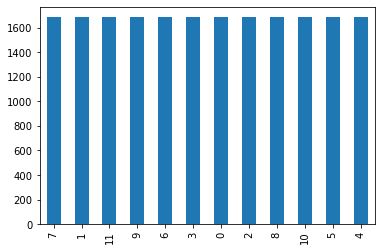

In [35]:
pd.Series(y_res).value_counts(sort=False).plot(kind='bar')

# RNN

In [32]:
#Model Building
model = Sequential()
model.add(Embedding(500, 120, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(704, dropout=0.4, recurrent_dropout=0.4))
model.add(Dense(352, activation='LeakyReLU'))
model.add(Dense(176, activation='LeakyReLU'))
model.add(Dense(1,activation='softmax'))
opt = optimizers.Adam(learning_rate=1e-04)
model.compile(loss = 'categorical_crossentropy', optimizer=opt, metrics = ['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2, 120)            60000     
                                                                 
 spatial_dropout1d (SpatialD  (None, 2, 120)           0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 704)               2323200   
                                                                 
 dense (Dense)               (None, 352)               248160    
                                                                 
 dense_1 (Dense)             (None, 176)               62128     
                                                                 
 dense_2 (Dense)             (None, 1)                 177       
                                                        

In [36]:
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(X_res, y_res, random_state =1)

In [37]:
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=5, min_lr=1e-06, verbose=1),
    ModelCheckpoint('model-amara.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

In [38]:
results = model.fit(train_x, train_y, batch_size=512, epochs=50, shuffle=True, callbacks=callbacks,\
                    validation_data=(valid_x, valid_y))


Epoch 1/50
30/30 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.0839
Epoch 1: val_loss improved from inf to 0.00000, saving model to model-amara.h5
30/30 [==============================] - 18s 393ms/step - loss: 0.0000e+00 - accuracy: 0.0839 - val_loss: 0.0000e+00 - val_accuracy: 0.0816 - lr: 1.0000e-04
Epoch 2/50
30/30 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.0839
Epoch 2: val_loss did not improve from 0.00000
30/30 [==============================] - 11s 361ms/step - loss: 0.0000e+00 - accuracy: 0.0839 - val_loss: 0.0000e+00 - val_accuracy: 0.0816 - lr: 1.0000e-04
Epoch 3/50
30/30 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.0839
Epoch 3: val_loss did not improve from 0.00000
30/30 [==============================] - 11s 363ms/step - loss: 0.0000e+00 - accuracy: 0.0839 - val_loss: 0.0000e+00 - val_accuracy: 0.0816 - lr: 1.0000e-04
Epoch 4/50
30/30 [==============================] - ETA: 0s - 

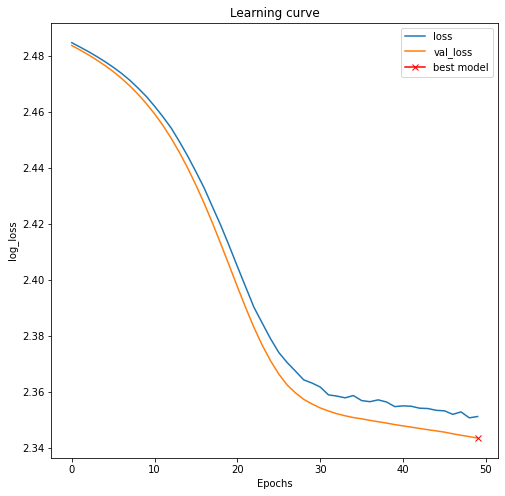

In [122]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
plt.plot( np.argmin(results.history["val_loss"]), np.min(results.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();


In [123]:
model.evaluate(valid_x, valid_y, verbose=1)


76/76 [==============================] - 1s 19ms/step - loss: 2.3434 - accuracy: 0.2307


[2.343428373336792, 0.23067383468151093]

In [124]:
## Predict

model.load_weights('model-amara.h5')
preds_train = model.predict(train_x)
preds_val = model.predict(valid_x)


76/76 [==============================] - 1s 19ms/step


In [ ]:
pred_class = preds_val.argmax(axis=-1)
cl = { 1:'brahmavargaḥdigvargaḥ', 2:'kṣatriyavargaḥ', 3:'manuṣyavargaḥ', 4:'nānārthavargaḥ',5:'saṅkīrṇavargaḥ', 6:'siṃhādivargaḥ', 7:'svargavargaḥ', 8:'vaiśyavargaḥ', 9:'vanauṣadhivargaḥ', 10:'viśeṣyanighnavargaḥ', 11:'vārivargaḥ'}
pred_class = [cl[pred_class[i]] for i in pred_class]
pred_class

In [ ]:
pd.Series(pred_class).value_counts(sort=False).plot(kind='bar')

<AxesSubplot:>

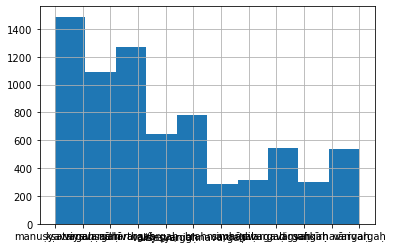

In [129]:
train_y.idxmax(axis=1).hist()
